### Using a pre-trained vision transformer to predict ages from face photos 

We try a pre-trained vision transformer for the age prediction task. This model  has been loaded from 



In [2]:
! pip install transformers

  Using cached transformers-4.41.2-py3-none-any.whl.metadata (43 kB)
  Using cached huggingface_hub-0.23.4-py3-none-any.whl.metadata (12 kB)
  Using cached regex-2024.5.15-cp312-cp312-macosx_11_0_arm64.whl.metadata (40 kB)
  Using cached tokenizers-0.19.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.7 kB)
  Using cached safetensors-0.4.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (3.8 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
Using cached transformers-4.41.2-py3-none-any.whl (9.1 MB)
Using cached huggingface_hub-0.23.4-py3-none-any.whl (402 kB)
Using cached regex-2024.5.15-cp312-cp312-macosx_11_0_arm64.whl (278 kB)
Using cached safetensors-0.4.3-cp312-cp312-macosx_11_0_arm64.whl (411 kB)
Using cached tokenizers-0.19.1-cp312-cp312-macosx_11_0_arm64.whl (2.4 MB)
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)


In [ ]:
from PIL import Image
from io import BytesIO

from transformers import ViTFeatureExtractor, ViTForImageClassification

from os import listdir
from PIL import Image as PImage

def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)

    return loadedImages

path = "test_examples/"

# your images in an array
imgs = loadImages(path)

for img in imgs:
    # you can show every image
    img.show()

# Init model, transforms
model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')
transforms = ViTFeatureExtractor.from_pretrained('nateraw/vit-age-classifier')

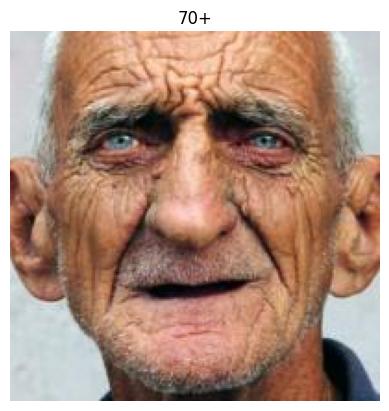

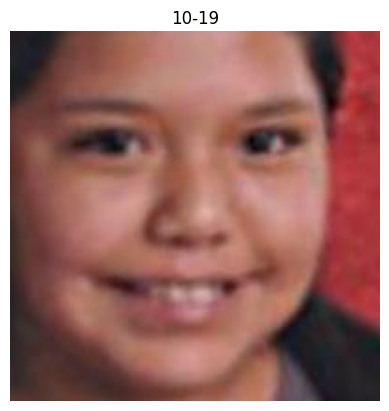

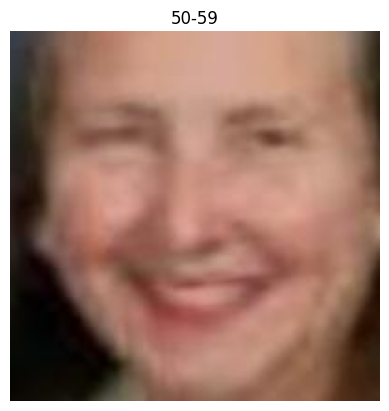

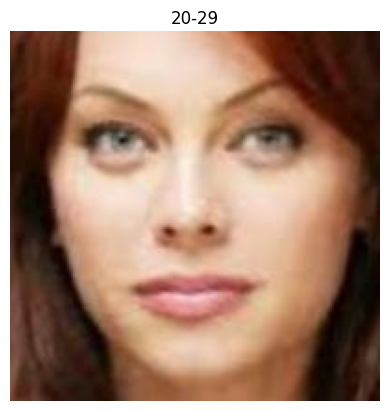

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

age_groups = ["0-2", "3-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"]

for im in imgs: 
    
    # Transform our image and pass it through the model
    inputs = transforms(im, return_tensors='pt')
    output = model(**inputs)
    
    # Predicted Class probabilities
    proba = output.logits.softmax(1)
    #print(proba)
    # Predicted Classes
    preds = proba.argmax(1)
    #print(preds)
    predicted_age = age_groups[int(preds)]

    # Display the selected image
    plt.imshow(im)
    plt.title(predicted_age)
    plt.axis('off')
    plt.show()